Titanic, launched on May 31, 1911, and set sail on its maiden voyage from Southampton on April 10,1912, with 2,240 passengers and crew on board. On April 15, 1912, after striking an iceberg.
Titanic broke apart and sank to the bottom of the ocean, taking with it the lives of more than 1,500 passengers and crew.

What particularly we need do in this challenges ?
 In this challenge, we need to complete the analysis of what sorts of people were likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy ?

# Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
mine = pd.read_csv(r"C:\Users\Utkarsh Tiwari\Downloads\tested.csv")
mine

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
mine.shape

(418, 12)

In [4]:
mine.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
mine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Exploratory Data Analysis

In [58]:
survived_counts = mine['Survived'].value_counts()
survived_counts

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

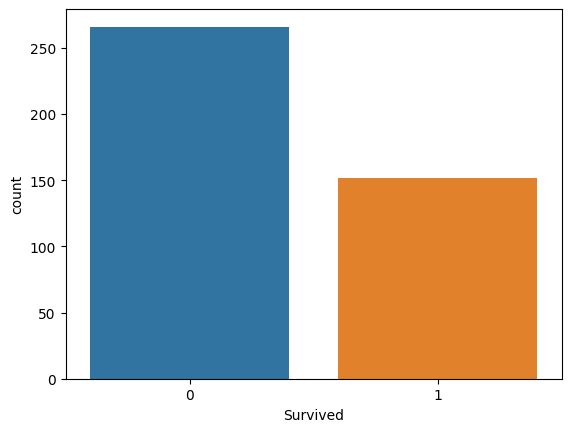

In [7]:
sns.countplot(x='Survived',data=mine)


<Axes: xlabel='Pclass', ylabel='count'>

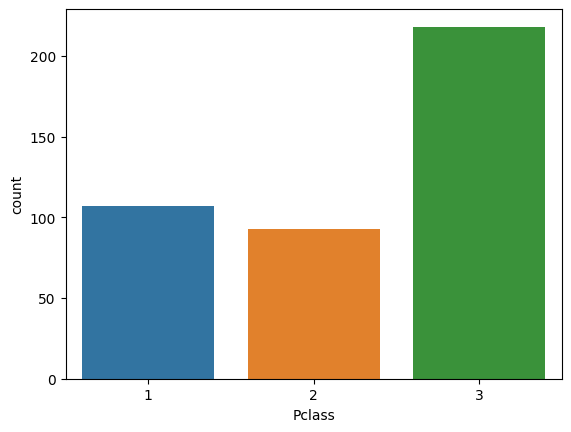

In [8]:
sns.countplot(data=mine, x='Pclass')

In [9]:
mine['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

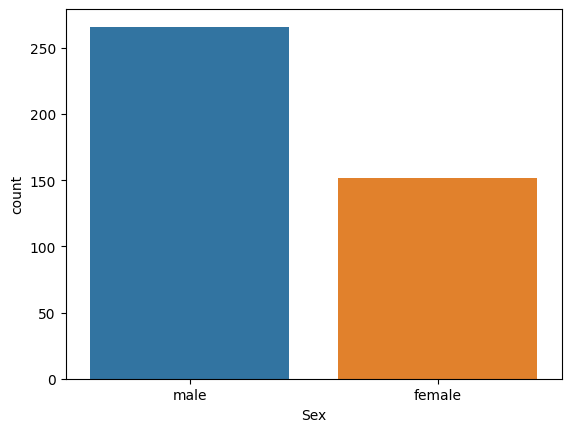

In [10]:
sns.countplot(x='Sex', data=mine)

<Axes: xlabel='SibSp', ylabel='count'>

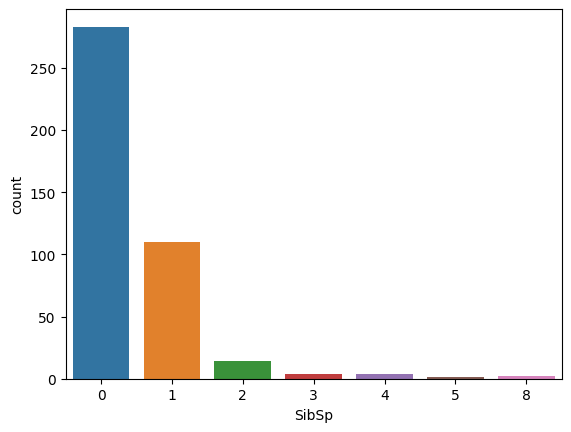

In [11]:
sns.countplot(data=mine, x='SibSp')

<Axes: xlabel='Parch', ylabel='count'>

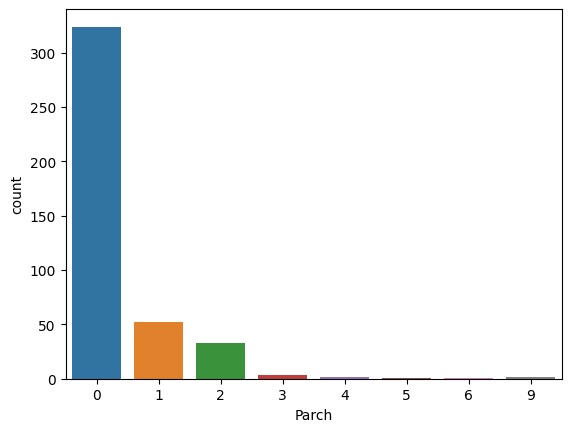

In [12]:
sns.countplot(x='Parch', data=mine)

In [59]:
# Display value counts for the 'Embarked' column
value_counts = mine['Embarked'].value_counts()
print(value_counts)

Embarked
2    270
0    102
1     46
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

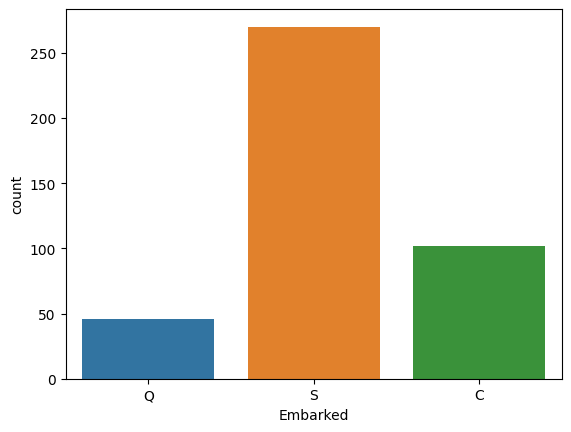

In [14]:
sns.countplot(x='Embarked', data=mine)

C:\Users\Utkarsh Tiwari\AppData\Local\Temp\ipykernel_9224\3704168177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mine['Age'])


<Axes: xlabel='Age', ylabel='Density'>

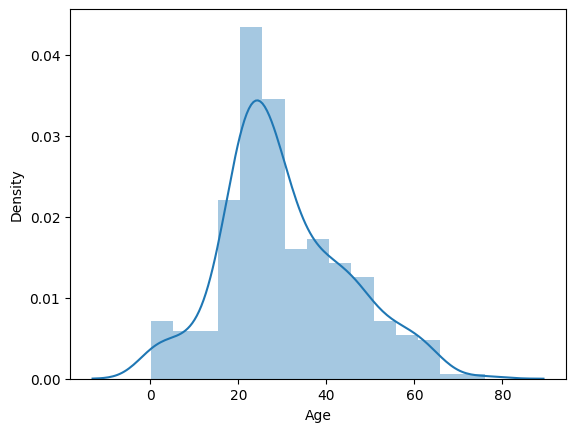

In [15]:
# Plot the distribution of Age
sns.distplot(mine['Age'])

C:\Users\Utkarsh Tiwari\AppData\Local\Temp\ipykernel_9224\1100670183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mine['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

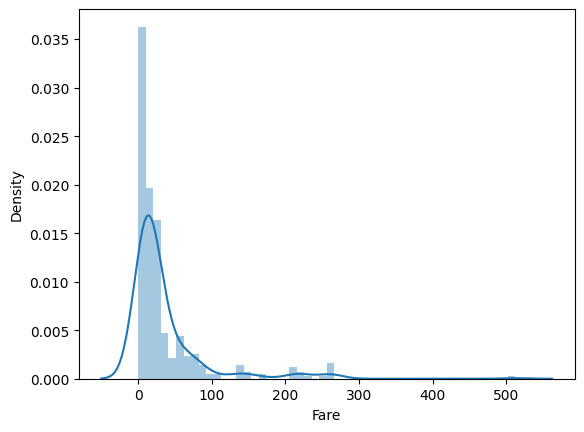

In [16]:
#Plot the distribution of Fare
sns.distplot(mine['Fare'])

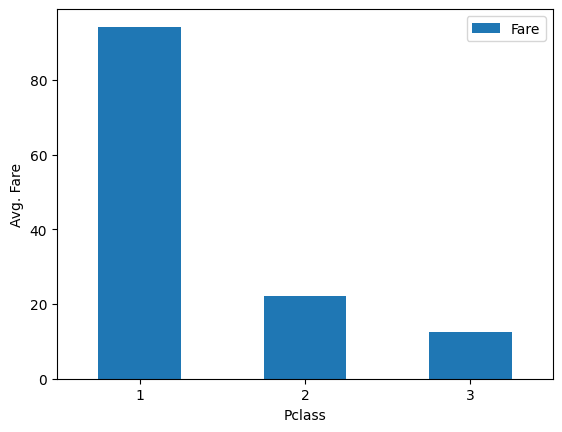

In [17]:
class_fare=mine.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

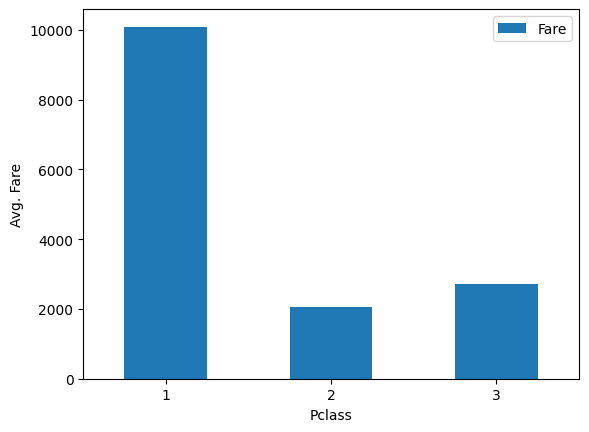

In [18]:
class_fare=mine.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

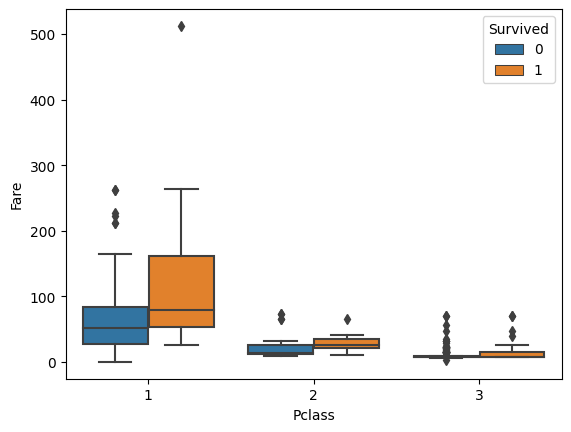

In [19]:
sns.boxplot(data=mine, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

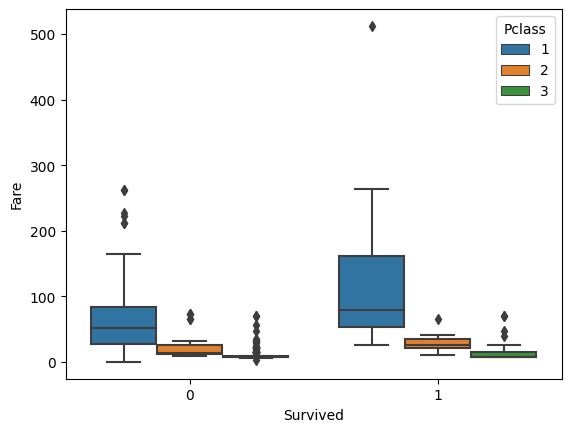

In [20]:
sns.boxplot(data=mine, x='Survived', y='Fare', hue='Pclass')

# Data Preprocessing

In [44]:
# Calculate the length of the mine DataFrame
mine_len=len(mine)

# Concatenate the mine DataFrame along axis 0
mine=pd.concat([mine], axis=0)

# Reset the index of the concatenated DataFrame
mine=mine.reset_index(drop=True)

# Display the first few rows of the concatenated DataFrame
mine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,0,3,1,34.5,0,7.8292,1
1,893,1,3,0,47.0,1,7.0000,2
2,894,0,2,1,62.0,0,9.6875,1
3,895,0,3,1,27.0,0,8.6625,2
4,896,1,3,0,22.0,1,12.2875,2


In [45]:
mine.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
413,1305,0,3,1,30.27259,0,8.0500,2
414,1306,1,1,0,39.00000,0,108.9000,0
415,1307,0,3,1,38.50000,0,7.2500,2
416,1308,0,3,1,30.27259,0,8.0500,2
417,1309,0,3,1,30.27259,1,22.3583,0


In [46]:
mine.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Fare           0
Embarked       0
dtype: int64

In [47]:
# Check if 'Cabin' column exists in mine dataframe
if 'Cabin' in mine.columns:
    mine = mine.drop(columns=['Cabin'], axis=1)

In [48]:
mine['Age'].mean()

30.272590361445783

In [49]:
# Filling missing values in 'Age' and 'Fare' columns with mean values
mine['Age']=mine['Age'].fillna(mine['Age'].mean())
mine['Fare']=mine['Fare'].fillna(mine['Fare'].mean())

In [62]:
mine['Embarked'].mode()[0]

2

In [51]:
mine['Embarked']=mine['Embarked'].fillna(mine['Embarked'].mode()[0])

# Correlation Matrix

<Axes: >

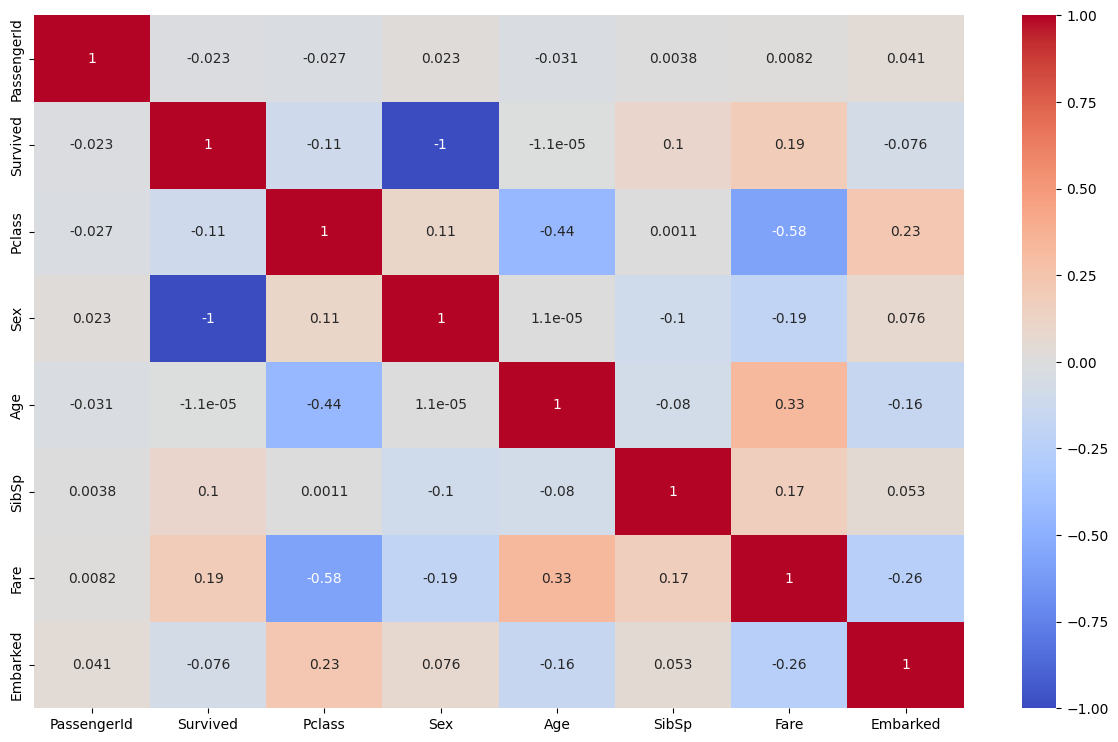

In [52]:
# List of columns to include in correlation computation
numeric_columns = mine.select_dtypes(include=['number']).columns

# Compute the correlation matrix for numeric columns only
corr = mine[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [64]:
# Check if columns exist before dropping them
columns_to_drop = ['Name', 'Ticket', 'Parch']
columns_to_drop_existing = [col for col in columns_to_drop if col in mine.columns]

if columns_to_drop_existing:
    mine = mine.drop(columns=columns_to_drop_existing, axis=1)

# Display the first few rows of the updated DataFrame
mine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,0,3,1,34.5,0,7.8292,1
1,893,1,3,0,47.0,1,7.0000,2
2,894,0,2,1,62.0,0,9.6875,1
3,895,0,3,1,27.0,0,8.6625,2
4,896,1,3,0,22.0,1,12.2875,2


# Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
colms = ['Sex', 'Embarked']
leb = LabelEncoder()

for colm in colms:
    mine[colm]=leb.fit_transform(mine[colm])
mine.head()    

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,0,3,1,34.5,0,7.8292,1
1,893,1,3,0,47.0,1,7.0000,2
2,894,0,2,1,62.0,0,9.6875,1
3,895,0,3,1,27.0,0,8.6625,2
4,896,1,3,0,22.0,1,12.2875,2


In [32]:
# Replacing values in the "Sex" and "Embarked" columns with numerical values
mine.replace({"Sex":{"male":0,"female":1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

# Displaying the first few rows of the updated DataFrame
mine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [55]:
mine=mine.iloc[:mine_len,:]
mine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,0,3,1,34.5,0,7.8292,1
1,893,1,3,0,47.0,1,7.0000,2
2,894,0,2,1,62.0,0,9.6875,1
3,895,0,3,1,27.0,0,8.6625,2
4,896,1,3,0,22.0,1,12.2875,2


In [34]:
x=mine.drop(columns=['PassengerId', 'Survived'], axis=1)
y=mine['Survived']
x.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,34.5,0,7.8292,1
1,3,0,47.0,1,7.0000,2
2,2,1,62.0,0,9.6875,1
3,3,1,27.0,0,8.6625,2
4,3,0,22.0,1,12.2875,2


# Model Training

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score

def classify(model):
    x_mine, x_test, y_mine, y_test = mine_test_split(x,y,test_size=0.25, random_state=42)
    model.fit(x_mine, y_mine)
    print("Accuracy", model.score(x_test, y_test))
    
    score=cross_val_score(model, x, y, cv=5)
    print('CV Score', np.mean(score))

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

Accuracy 1.0
CV Score 1.0


In [37]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Accuracy 1.0
CV Score 1.0


In [38]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Accuracy 1.0
CV Score 1.0


In [39]:
from xgboost import XGBClassifier
model=XGBClassifier()
classify(model)

Accuracy 1.0
CV Score 1.0


In [40]:
from lightgbm import LGBMClassifier

model=LGBMClassifier()
model.fit(x, y)

[LightGBM] [Info] Number of positive: 152, number of negative: 266
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 418, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363636 -> initscore=-0.559616
[LightGBM] [Info] Start training from score -0.559616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMClassifier()

In [41]:
x_mine=mine.drop(columns=['PassengerId', 'Survived'], axis=1)
x_mine.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,34.5,0,7.8292,1
1,3,0,47.0,1,7.0000,2
2,2,1,62.0,0,9.6875,1
3,3,1,27.0,0,8.6625,2
4,3,0,22.0,1,12.2875,2


In [42]:
pred = model.predict(x_mine)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
#Dataset source:https://www.kaggle.com/datasets/brendan45774/test-file

This project is submitted by Utkarsh Tiwari.

And that brings us to the end. I’d like to thank you for your time and attention today.

Thank you so much for your interest and attention.